In [42]:
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [4]:
#import the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.rename(columns = {'Chance of Admit ':'Chance of Admission'}, inplace = True)

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
#concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial No.           500 non-null    int64  
 1   GRE Score            500 non-null    int64  
 2   TOEFL Score          500 non-null    int64  
 3   University Rating    500 non-null    int64  
 4   SOP                  500 non-null    float64
 5   LOR                  500 non-null    float64
 6   CGPA                 500 non-null    float64
 7   Research             500 non-null    int64  
 8   Chance of Admission  500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
#view some basic statistical details of the dataframe
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admission
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admission'>

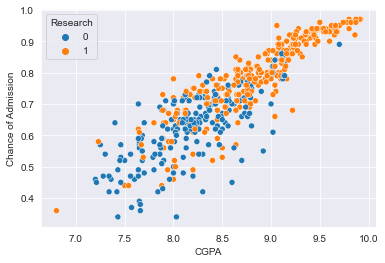

In [9]:
sns.scatterplot(data=df, x="CGPA", y="Chance of Admission", hue = "Research") 

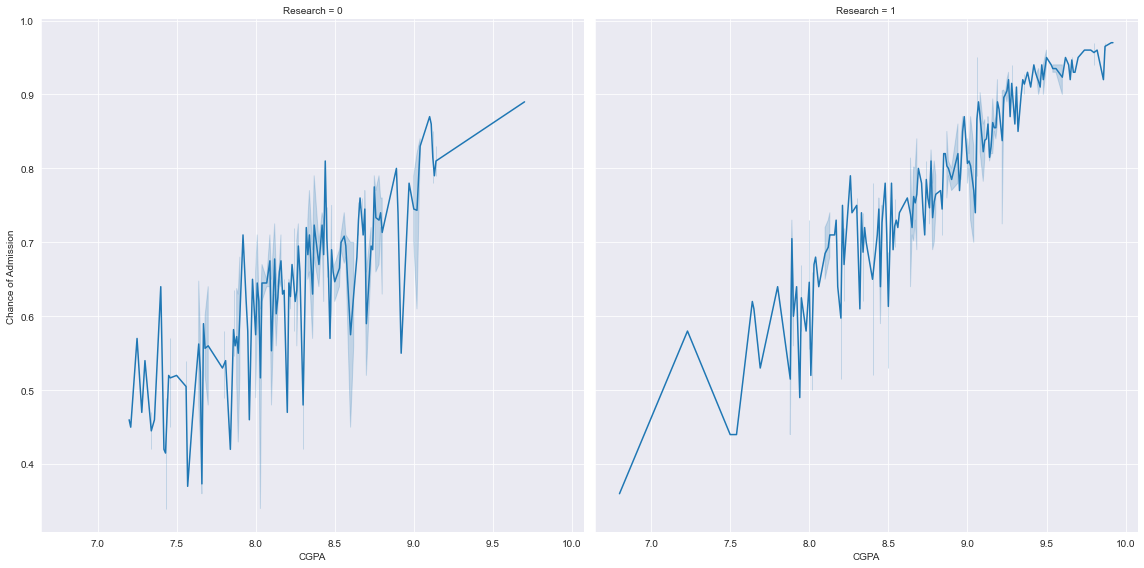

In [10]:
g = sns.FacetGrid(df, col="Research", height= 8)
g.map(sns.lineplot, "CGPA", "Chance of Admission")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admission'>

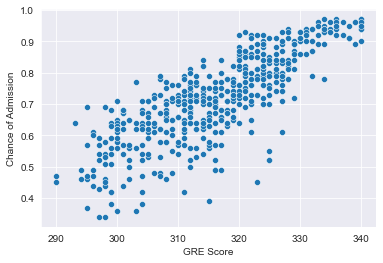

In [11]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'Chance of Admission')

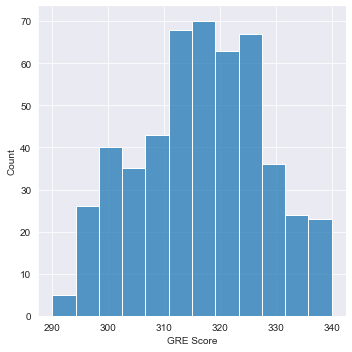

In [12]:
sns.displot(data=df, x="GRE Score")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admission'>

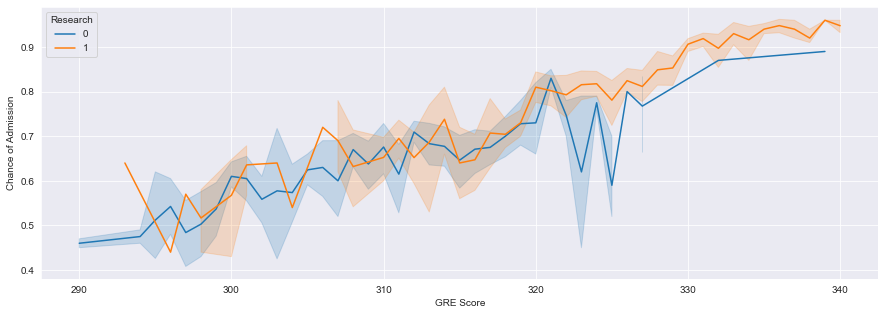

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="GRE Score", y="Chance of Admission", hue = "Research")

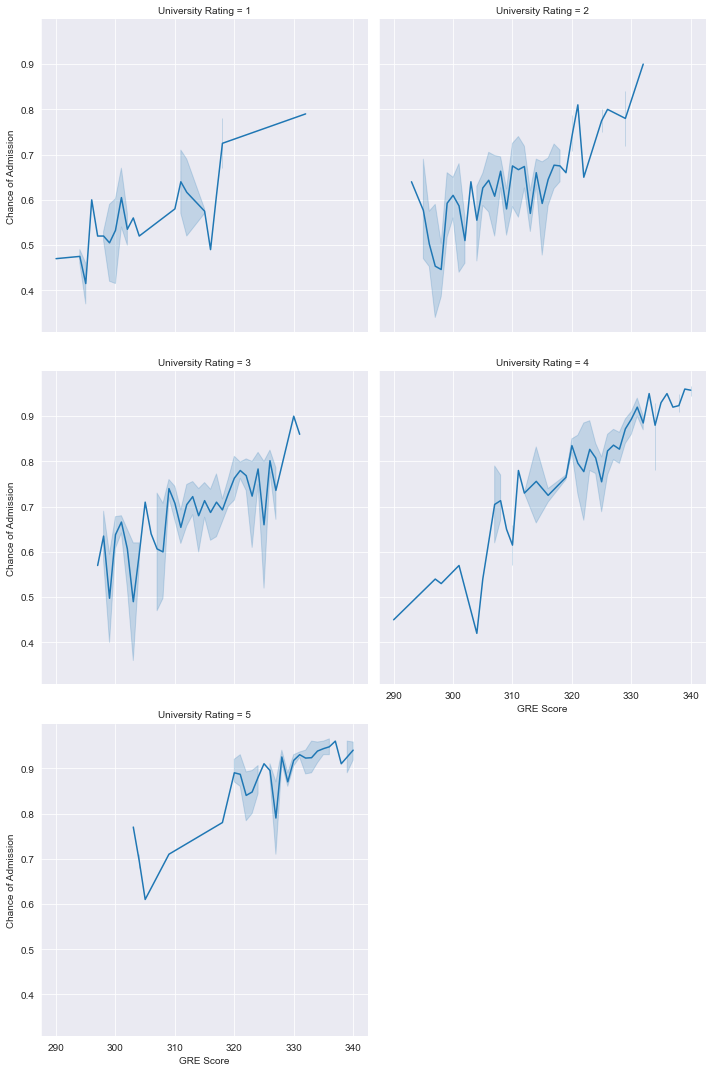

In [14]:
g = sns.FacetGrid(df, col="University Rating", height= 5, col_wrap=2)
g.map(sns.lineplot, "GRE Score", "Chance of Admission")

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admission'>

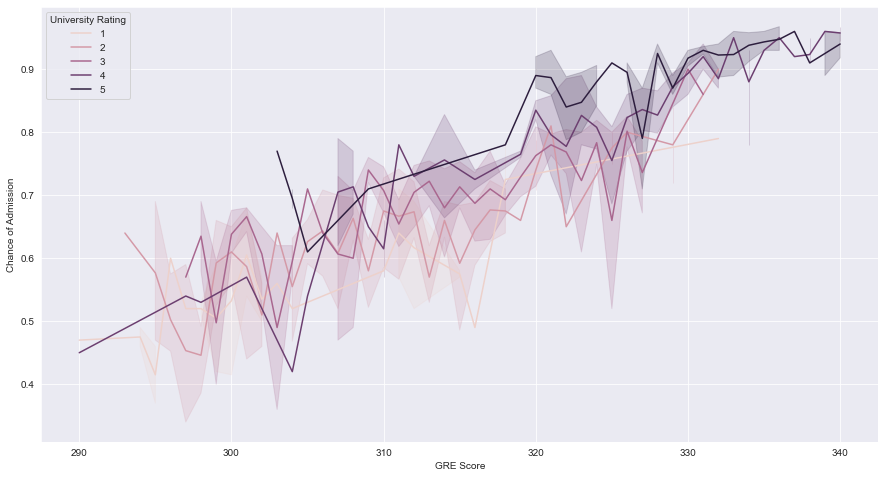

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="GRE Score", y="Chance of Admission", hue = "University Rating", )

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admission'>

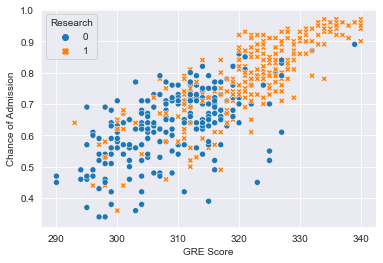

In [16]:
sns.scatterplot(data=df, x="GRE Score", y="Chance of Admission", hue="Research", style = "Research")

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admission'>

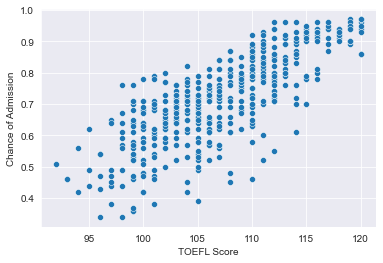

In [17]:
sns.scatterplot(data = df, x = 'TOEFL Score', y = 'Chance of Admission')

In [18]:
df = df.drop(['Serial No.'], axis = 1)

In [19]:
X = df.drop(['Chance of Admission'], axis =1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
y = df['Chance of Admission']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admission, dtype: float64

In [21]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [22]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 7), (150, 7), (350,), (150,))

In [24]:
#linear regression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
#lasso regression
ls = linear_model.Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1)

In [26]:
#linear SVR
sv = LinearSVR(random_state=0, tol=1e-5, max_iter=30000)
sv.fit(X_train, y_train)

LinearSVR(max_iter=30000, random_state=0, tol=1e-05)

In [27]:
#Thiel San Regressor
ts = linear_model.TheilSenRegressor(random_state=0)
ts.fit(X_train, y_train)

TheilSenRegressor(max_subpopulation=10000, random_state=0)

In [28]:
#Least Angle Regression
la = linear_model.Lars()
la.fit(X_train, y_train)

Lars()

In [29]:
#Ridge regression
rg = linear_model.Ridge(alpha=.5)
rg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [30]:
#Elastic Net
en = linear_model.ElasticNet(random_state=0)
en.fit(X_train, y_train)

ElasticNet(random_state=0)

In [31]:
#Bayesian Regression
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

BayesianRidge()

In [32]:
lr_pred = lr.predict(X_test)
ls_pred = ls.predict(X_test)
sv_pred = sv.predict(X_test)
ts_pred = ts.predict(X_test)
la_pred = la.predict(X_test)
rg_pred = rg.predict(X_test)
en_pred = en.predict(X_test)
br_pred = br.predict(X_test)

In [33]:
mean_absolute_error(y_test, lr_pred)

0.04267341377223833

In [34]:
mean_absolute_error(y_test, ls_pred)

0.09888774643754933

In [35]:
mean_absolute_error(y_test, sv_pred)

0.042070073274135304

In [36]:
mean_absolute_error(y_test, ts_pred)

0.04219109313479194

In [37]:
mean_absolute_error(y_test, la_pred)

0.04267341377223833

In [38]:
mean_absolute_error(y_test, rg_pred)

0.04268525429397078

In [39]:
mean_absolute_error(y_test, en_pred)

0.11470247619047622

In [40]:
mean_absolute_error(y_test, br_pred)

0.042763565352730216

In [52]:
# Generalisation
best_model = pd.DataFrame({
    'model': ['Linear Regression', 'Lasso', 'Linear SVR', 'Thiel San Regressor', 'Least Angle Regression',
              'Ridge regression', 'Elastic Net', 'Bayesian Regression'],
    
    'score': [round(lr.score(X_test,y_test) * 100, 4), round(ls.score(X_test,y_test) * 100, 4),
                   round(sv.score(X_test,y_test) * 100, 4), round(ts.score(X_test,y_test) * 100, 4),
                  round(la.score(X_test,y_test) * 100, 4), round(rg.score(X_test,y_test) * 100, 4), 
                 round(en.score(X_test,y_test) * 100, 4), round(br.score(X_test,y_test) * 100, 4)],
                   
    'mae': [round(mean_absolute_error(y_test, lr_pred), 4), round(mean_absolute_error(y_test, ls_pred), 4),
           round(mean_absolute_error(y_test, sv_pred), 4), round(mean_absolute_error(y_test, ts_pred), 4),
           round(mean_absolute_error(y_test, la_pred), 4), round(mean_absolute_error(y_test, rg_pred), 4),
           round(mean_absolute_error(y_test, en_pred), 4), round(mean_absolute_error(y_test, br_pred), 4)],
    
    'mse': [round(mean_squared_error(y_test, lr_pred), 4), round(mean_squared_error(y_test, ls_pred), 4),
            round(mean_squared_error(y_test, sv_pred), 4), round(mean_squared_error(y_test, ts_pred), 4),
            round(mean_squared_error(y_test, la_pred), 4), round(mean_squared_error(y_test, rg_pred), 4),
            round(mean_squared_error(y_test, en_pred), 4), round(mean_squared_error(y_test, br_pred), 4)],
    
    'rmse': [(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))),(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))),
             (np.sqrt(metrics.mean_squared_error(y_test, sv_pred))), (np.sqrt(metrics.mean_squared_error(y_test, ts_pred))),
             (np.sqrt(metrics.mean_squared_error(y_test, la_pred))), (np.sqrt(metrics.mean_squared_error(y_test, rg_pred))),
             (np.sqrt(metrics.mean_squared_error(y_test, en_pred))), (np.sqrt(metrics.mean_squared_error(y_test, br_pred)))]
})
best_model

,model,score,mae,mse,rmse
0,Linear Regression,82.5631,0.0427,0.0036,0.060284
1,Lasso,24.5109,0.0989,0.0157,0.060284
2,Linear SVR,81.8269,0.0421,0.0038,0.061544
3,Thiel San Regressor,82.4717,0.0422,0.0037,0.060442
4,Least Angle Regression,82.5631,0.0427,0.0036,0.060284
5,Ridge regression,82.5652,0.0427,0.0036,0.060281
6,Elastic Net,-0.2933,0.1147,0.0209,0.144579
7,Bayesian Regression,82.5742,0.0428,0.0036,0.060265
